In [18]:
import numpy as np 
import matplotlib.pyplot as plt

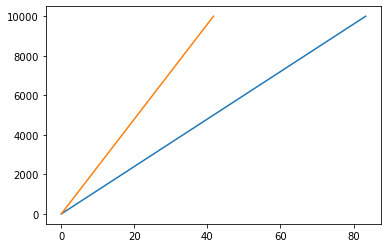

In [19]:
s = 1e4

s2 = np.arange(0, s, 2)
s4 = np.arange(0, s, 4)

v2 = np.gradient(s2)
v4 = np.gradient(s4)

a2 = np.gradient(v2)
a4 = np.gradient(v4)

time_v2 = np.arange(0,len(v2),1)/60
time_v4 = np.arange(0,len(v4),1)/60

plt.plot(time_v2,s2)
plt.plot(time_v4,s4)

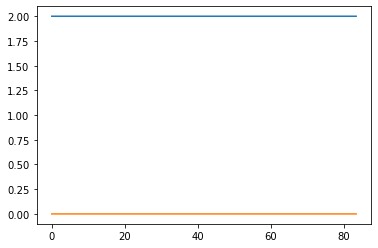

In [20]:
plt.plot (time_v2,v2)
plt.plot(time_v2,a2)

In [52]:
def get_mp(v,a):
    ec = 4
    g = 9.81
    es = a / g
    em = np.sqrt( (a**2 / g**2) + 1 )

    ecr = (155.4 * es**5 - 30.4 * es**4 - 43.3 * es**3 + 46.3 * es**2 + 19.5 * es + ec) *em

    mp = ecr * v
    return mp

In [55]:
mp2 = get_mp(v2,a2)
mp4 = get_mp(v4,a4)

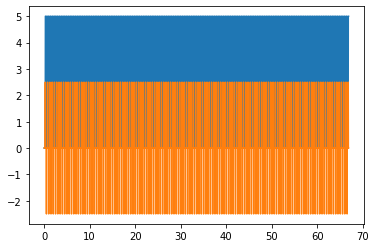

In [87]:
v = np.array([0,5])
t_int = 15
cycles = int(np.ceil(s/sum(t_int*v)))

v_int = np.repeat(v, t_int)
v_int = np.tile(v_int,cycles)
v_int = np.delete(v_int,np.cumsum(v_int)>s)

s_int = np.cumsum(v_int)
a_int = np.gradient(v_int)
time_int = np.arange(0,len(v_int),1)/60
mp_int = get_mp(v_int,a_int)

plt.plot(time_int,v_int)
plt.plot(time_int,a_int)



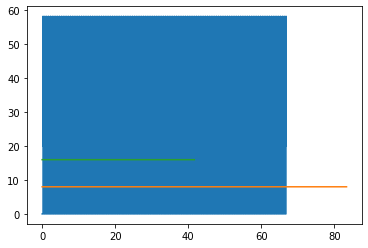

In [88]:
plt.plot(time_int,mp_int)
plt.plot(time_v2,mp2)
plt.plot(time_v4,mp4)


In [89]:
print(f"Total energy expenditure after 10km constantly at 2 m/s: {round(sum(mp2))} J/kg")
print(f"Total energy expenditure after 10km constantly at 4 m/s: {round(sum(mp4))} J/kg")
print(f"Total energy expenditure after 10km intermittently between 2 and 6 m/s: {round(sum(mp_int))} J/kg")

Total energy expenditure after 10km constantly at 2 m/s: 40000 J/kg
Total energy expenditure after 10km constantly at 4 m/s: 40000 J/kg
Total energy expenditure after 10km intermittently between 2 and 6 m/s: 44159 J/kg


In [85]:
sum(mp_int)/sum(mp2)


1.052083706408144